In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Transformers
==============

Unsupervised transformations for preprocessing
--------------------------------------------------

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['DESCR', 'feature_names', 'target', 'data'])

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [4]:
np.set_printoptions(suppress=True)
print(X_train)

[[   5.73116    0.        18.1     ...,   20.2      395.28       7.01   ]
 [  15.288      0.        18.1     ...,   20.2      363.02      23.24   ]
 [   0.61154   20.         3.97    ...,   13.       389.7        5.12   ]
 ..., 
 [   5.29305    0.        18.1     ...,   20.2      378.38      18.76   ]
 [   0.62356    0.         6.2     ...,   17.4      390.39       9.93   ]
 [   0.10612   30.         4.93    ...,   16.6      394.62      12.4    ]]


In [5]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [   3.09389596   11.10817942   10.93044855    0.06860158    0.55335277
    6.29170185   68.40263852    3.81176253    8.8944591   397.37994723
   18.34327177  360.02955145   12.41087071] 
standard deviation : [   7.88048138   23.19138935    6.87882223    0.25277541    0.11584104
    0.71889567   28.05535319    2.10957479    8.30293497  162.3218511
    2.18161564   84.94360071    7.02661356] 


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_scaled = scaler.transform(X_train)

In [10]:
# print(X.shape)
print(X_scaled.shape)

(379, 13)


In [11]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [ 0.  0.  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.  0.] 
standard deviation : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 


In [12]:
X_scaled_test = scaler.transform(X_test)

Principal Component Analysis
=============================

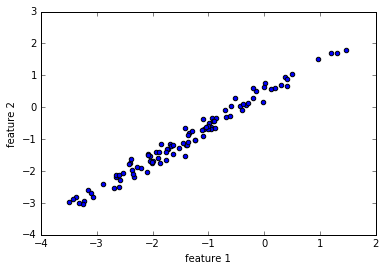

In [13]:
rnd = np.random.RandomState(42)
X_blob = np.dot(rnd.normal(size=(100, 2)), rnd.normal(size=(2, 2))) + rnd.normal(size=2)
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
pca.fit(X_blob)

PCA(copy=True, n_components=None, whiten=False)

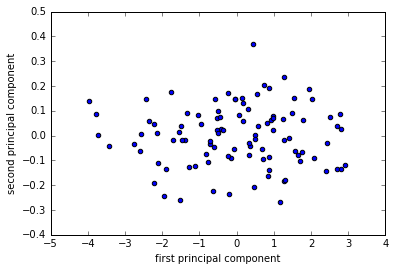

In [16]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

PCA for dimensionality Reduction
---------------------------------

In [17]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)
X, y = digits.data, digits.target
print(X.shape)

(901, 64)


In [18]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [19]:
X_reduced = pca.transform(X)
print("Reduced dataset shape: %s" % (X_reduced.shape, ))

Reduced dataset shape: (901, 2)


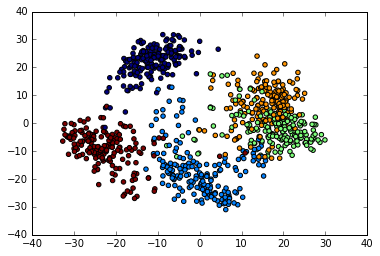

In [20]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)